In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

%run csv_dataClean_v3ng_api.ipynb

In [2]:
df = pd.read_csv(r'C:\Users\Josh\binar-data-science\binar-data-science\csv\twitter_data_raw.csv',encoding='latin-1')
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


___data frame info___

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [4]:
df.shape

(13169, 13)

___checking duplicated and null data___

In [5]:
# Check Duplicates
df.duplicated().sum()

125

In [6]:
# Check Null Data
df.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

___drop duplicates___

In [7]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [8]:
# Apply Cleaning function
df['Tweet_Clean'] = df['Tweet'].apply(cleansing)

In [9]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Tweet_Clean
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,di saat semua cowok berusaha melacak perhatian...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa yang telat memberi tau kamu edan sarap g...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berpikir kenapa aku tetap percaya p...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku itu aku ku tau matamu sipit tapi dilihat d...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir sudah kelihatan dongoknya da...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal berbicara ndasmu congor kamu yang ...
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu tidak lagi bosan duh
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,bom yang real mudah terdeteksi bom yang terkub...


___Generating Total Char & Words from Clean Tweet___

In [10]:
# Generate Total char to 'Total_Char' column
df['Total_Char'] = df['Tweet_Clean'].apply(len)
# Generate Total word to 'Total_Word' column
df['Total_Word'] = df['Tweet_Clean'].apply(lambda sent: len(sent.split()))
# Reindex column for result comparison
df = df.reindex(columns=['Tweet', 'Tweet_Clean', 'Total_Char', 'Total_Word', 'HS', 'Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'])
df.head(10)

,Tweet,Tweet_Clean,Total_Char,Total_Word,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,di saat semua cowok berusaha melacak perhatian...,133,22,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat memberi tau kamu edan sarap g...,107,19,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",kadang aku berpikir kenapa aku tetap percaya p...,248,38,0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku ku tau matamu sipit tapi dilihat d...,62,13,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kafir sudah kelihatan dongoknya da...,76,12,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,ya bani taplak dan kawan kawan,30,6,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,deklarasi pilihan kepala daerah aman dan anti ...,74,12,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,gue baru saja selesai re watch aldnoah zero pa...,121,19,0,1,0,0,0,0,0,0,0,0,0,0
8,Nah admin belanja satu lagi port terbaik nak m...,nah admin belanja satu lagi po terbaik nak mak...,203,36,0,0,0,0,0,0,0,0,0,0,0,0
9,USER Enak lg klo smbil ngewe',enak lagi kalau sambil ngewe,28,5,0,1,0,0,0,0,0,0,0,0,0,0


In [11]:
df[df['Abusive'] == 1]['Tweet_Clean'].sample(10)

5903           umatnya anies sandi itu makna otaknya dobol
4305     kalau ada yang percaya nenek peot yang satu in...
367      ingat baik baik kata sih royson jokowi kacung ...
6055     itu cuma bacot doang gue yakin tidak akan bera...
1123     kamu yang lebih dongok super er kok promosikan...
6858              sama kayak papaku apa memanggil mau nete
763                         wkwk ke trigger juga bani onta
11325                                  ingin bilang jancuk
2669                           najis enggak usah sebut itu
4108                                    seram banget setan
Name: Tweet_Clean, dtype: object

### Exploratory on data

____Average Words and Characters in these Tweets Data set____

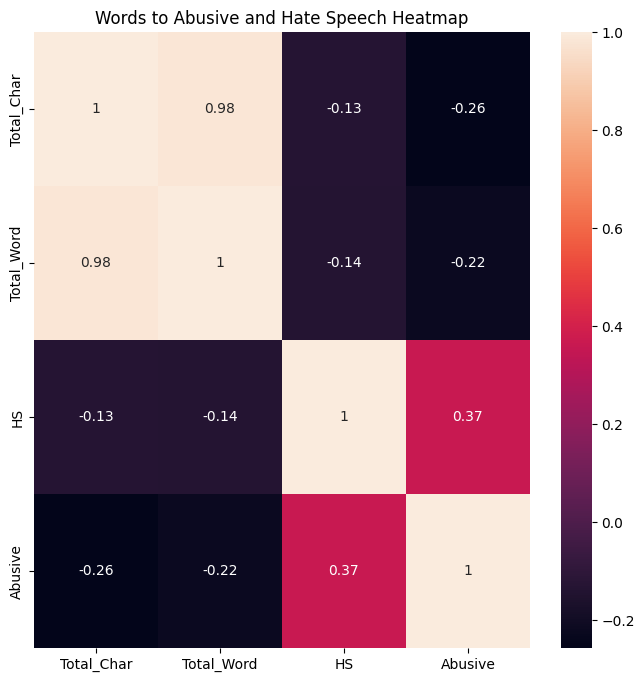

In [12]:
heatmaps = ['Total_Char', 'Total_Word', 'HS', 'Abusive']
       

# Membuat matriks korelasi
corr = df[heatmaps].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True)
plt.title('Words to Abusive and Hate Speech Heatmap')
plt.show()

In [13]:
df_mean = pd.DataFrame({'Mean_Char': df["Total_Char"].mean(),
                   'Mean_Word': df["Total_Word"].mean(),
                    }, index=[1])
df_mean

,Mean_Char,Mean_Word
1,107.984207,16.962741


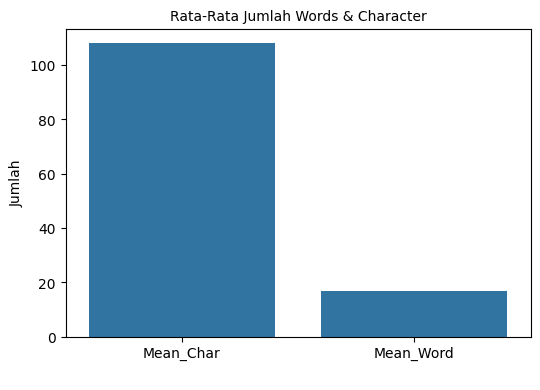

In [14]:
plt.figure(figsize= (6,4))
ax = sns.barplot(x=df_mean.columns, y=df_mean.values[0])

plt.title('Rata-Rata Jumlah Words & Character' , fontsize=10)
plt.xlabel(' ', fontsize=10)
plt.ylabel('Jumlah')

plt.show()

In [15]:
Mean_Total_Char = df["Total_Char"].mean()
Mean_Total_Word = df["Total_Word"].mean()

Mean_absv_Total_Word = df[df['Abusive'] == 1]['Total_Word'].mean()
Mean_absv_Total_Char = df[df['Abusive'] == 1]['Total_Char'].mean()

Mean_Total_Word
Mean_absv_Total_Word
print('Rata-rata kata tweet keseluruhan adalah', Mean_Total_Word)
print('Rata-rata kata tweet abusive adalah', Mean_absv_Total_Word)

print()

Mean_Total_Char
print('Rata-rata karakter tweet keseluruhan adalah', Mean_Total_Char)
Mean_absv_Total_Char
print('Rata-rata karakter tweet abusive adalah', Mean_absv_Total_Char)

Rata-rata kata tweet keseluruhan adalah 16.962741490340388
Rata-rata kata tweet abusive adalah 13.877922077922078

Rata-rata karakter tweet keseluruhan adalah 107.98420729837473
Rata-rata karakter tweet abusive adalah 84.71288711288712


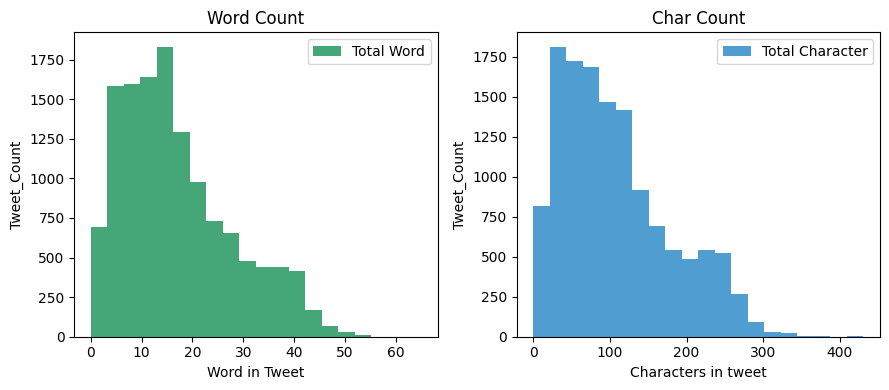

In [16]:
#Show Words and Char count in histogram
plt.figure(figsize=(9,4))

plt.subplot(1, 2, 1)
plt.hist(df['Total_Word'], bins=20, color='#45a778', label='Total Word')
plt.title('Word Count')
plt.xlabel('Word in Tweet')
plt.ylabel('Tweet_Count')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['Total_Char'], bins=20, color='#509dd1', label='Total Character')
plt.title('Char Count')
plt.xlabel('Characters in tweet')
plt.ylabel('Tweet_Count')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
df_nhs_word = df[df['HS'] == 0]['Total_Word']
df_hs_word = df[df['HS'] == 1]['Total_Word']

df_nhs_word.index.size


7526

In [18]:
df_hs_word.index.size

5518

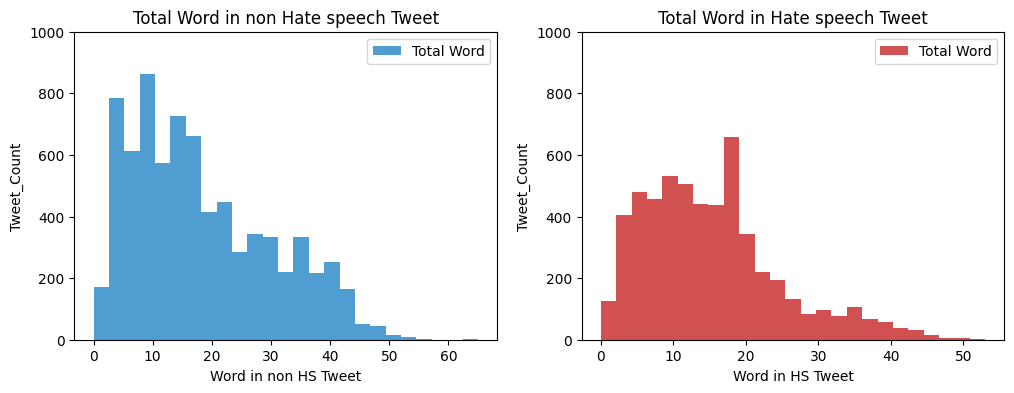

In [19]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.hist(df_nhs_word, bins=25, color='#509dd1', label='Total Word')
plt.title('Total Word in non Hate speech Tweet')
plt.ylim((None, 1000))
plt.xlabel('Word in non HS Tweet')
plt.ylabel('Tweet_Count')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df_hs_word, bins=25, color='#d15050', label='Total Word')
plt.title('Total Word in Hate speech Tweet')
plt.ylim((None, 1000))
plt.xlabel('Word in HS Tweet')
plt.ylabel('Tweet_Count')
plt.legend()
plt.show()

In [20]:
df_nabsv_word = df[df['Abusive'] == 0]['Total_Word']
df_absv_word = df[df['Abusive'] == 1]['Total_Word']

df_nabsv_word.index.size

8039

In [21]:
df_absv_word.index.size

5005

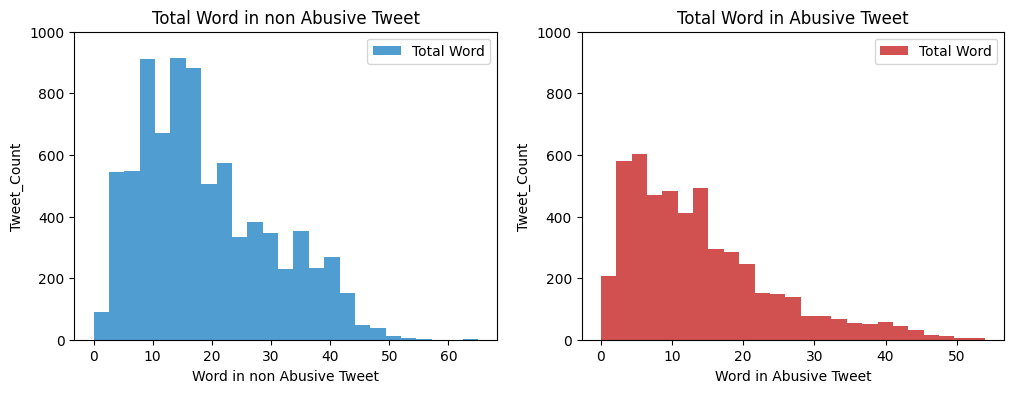

In [22]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.hist(df_nabsv_word, bins=25, color='#509dd1', label='Total Word')
plt.title('Total Word in non Abusive Tweet')
plt.ylim((None, 1000))
plt.xlabel('Word in non Abusive Tweet')
plt.ylabel('Tweet_Count')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df_absv_word, bins=25, color='#d15050', label='Total Word')
plt.title('Total Word in Abusive Tweet')
plt.ylim((None, 1000))
plt.xlabel('Word in Abusive Tweet')
plt.ylabel('Tweet_Count')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

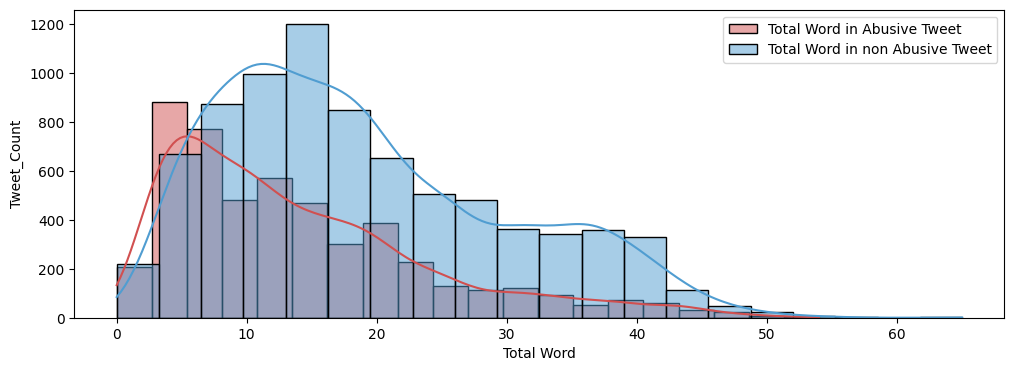

In [23]:
plt.figure(figsize=(12,4))
sns.histplot(df.Total_Word[df.Abusive == 1 ], bins=20, color='#d15050', label='Total Word in Abusive Tweet', kde=True)
sns.histplot(df.Total_Word[df.Abusive == 0 ], bins=20, color='#509dd1', label='Total Word in non Abusive Tweet', kde=True)
plt.ylabel('Tweet_Count')
plt.xlabel('Total Word')
plt.legend()
plt.show

In [24]:
bar_df = df.drop(df.columns[[1, 2, 3, 4, 5]], axis=1, inplace=False)
bar_df = pd.melt(bar_df)

<function matplotlib.pyplot.show(close=None, block=None)>

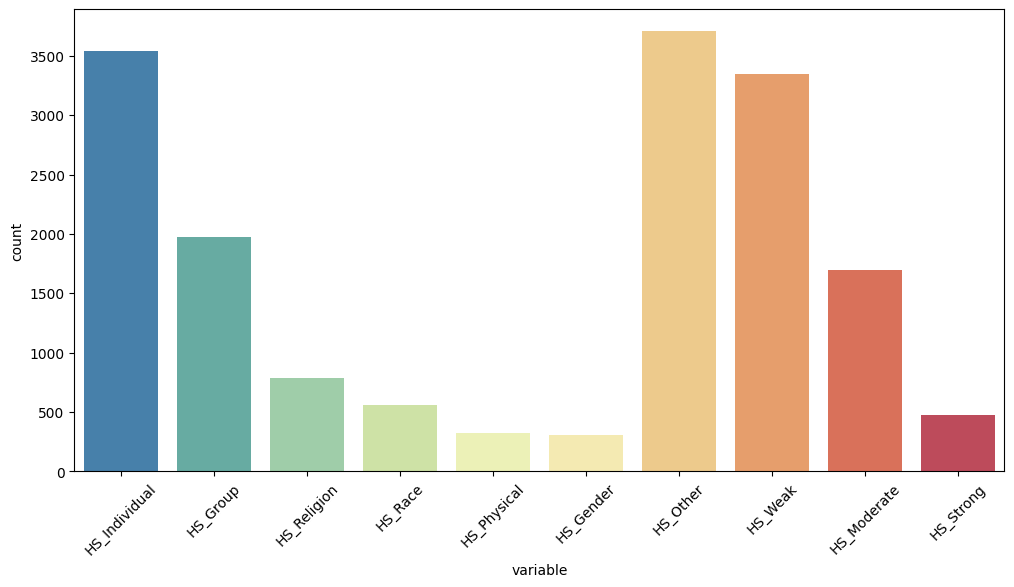

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data=bar_df.loc[bar_df['value']==1], x='variable', hue='variable', palette='Spectral_r')
# sns.barplot(x=df.value_counts().index, y = df.value_counts().values, data=df, estimator=sum)
plt.xticks(rotation=45)
plt.show

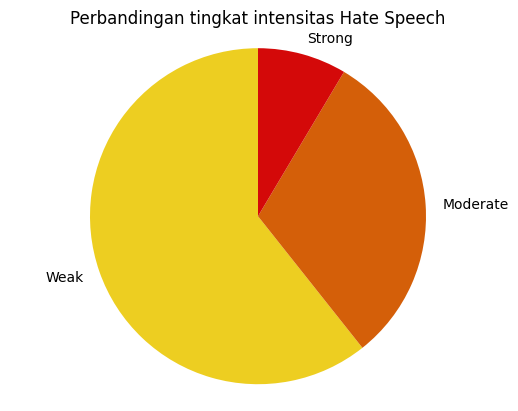

In [26]:
total_weak = df['HS_Weak'].sum()
total_Moderate = df['HS_Moderate'].sum()
total_Strong = df['HS_Strong'].sum()

labels = ['Weak', 'Moderate', 'Strong']
sizes = [total_weak, total_Moderate, total_Strong]
colors = ['#edce21', '#d45f09', '#d40909']

plt.pie(sizes, labels=labels, colors=colors, startangle=90)
plt.axis('equal')
plt.title('Perbandingan tingkat intensitas Hate Speech')
plt.show()

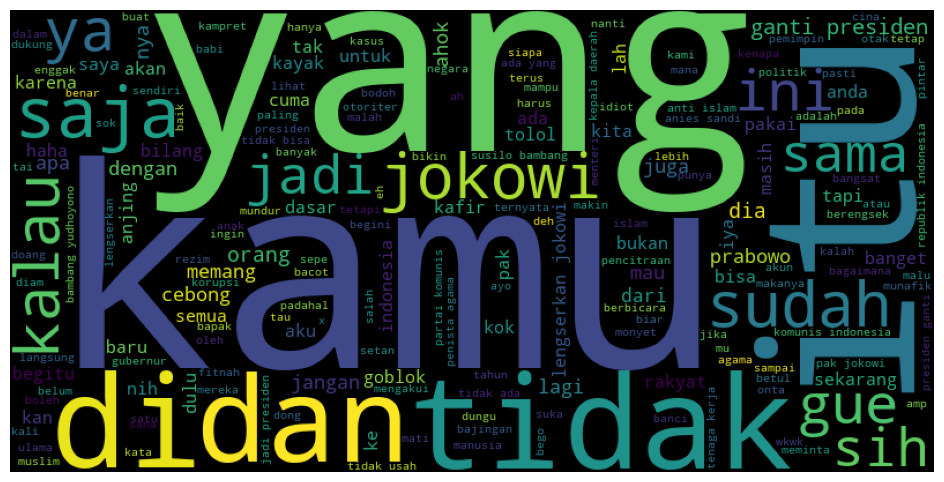

In [27]:
hs_individual = df.loc[df['HS_Individual'] == 1]
text = ' '.join(hs_individual['Tweet_Clean'])

wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

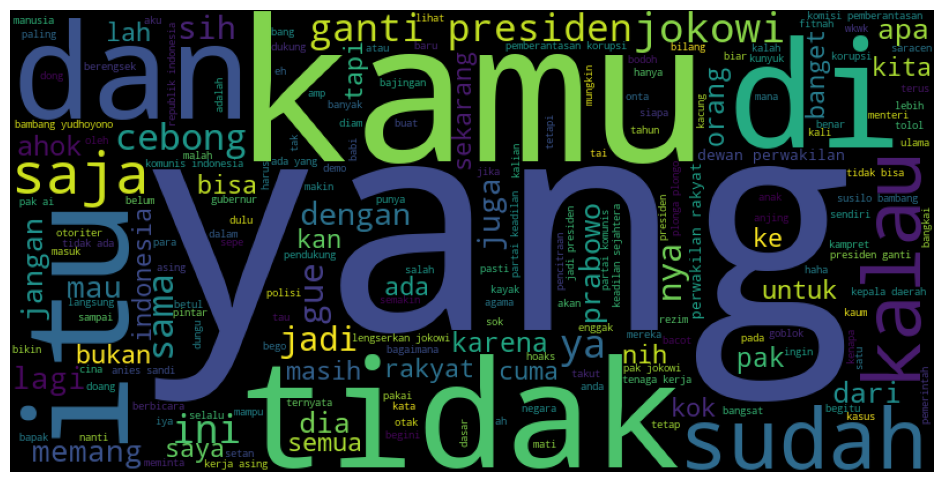

In [28]:
hs_individual = df.loc[df['HS_Other'] == 1]
text = ' '.join(hs_individual['Tweet_Clean'])

wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()